本文转自https://mp.weixin.qq.com/s/oLgpTGdQgcka-OD757_3lA

ggplot2基本要素

    数据和映射
    几何对象
    标尺
    统计变换
    坐标系统
    图层
    分面
    主题

这里将从这些基本要素对ggplot2进行介绍。

# 数据和映射

下面以一份钻石的数据为例，这份数据非常大，随机取一个子集来画图。

In [1]:
require(ggplot2)
data(diamonds)
set.seed(42)
small <- diamonds[sample(nrow(diamonds),1000),]
head(small)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"

carat,cut,color,clarity,depth,table,price,x,y,z
0.71,Very Good,H,SI1,62.5,60,2096,5.68,5.75,3.57
0.79,Premium,H,SI1,61.8,59,2275,5.97,5.91,3.67
1.03,Ideal,F,SI1,62.4,57,6178,6.48,6.44,4.03
0.50,Ideal,E,VS2,62.2,54,1624,5.08,5.11,3.17
0.27,Ideal,E,VS1,61.6,56,470,4.14,4.17,2.56
0.30,Premium,E,VS2,61.7,58,658,4.32,4.34,2.67


画图实际上是把数据中的变量映射到图形属性上。以克拉数为X轴变量，价格为Y轴变量。

In [2]:
p <- ggplot(data = small, mapping = aes(x = carat, y = price))

上面这行代码把数据映射XY坐标轴上，需要告诉ggplot2，这些数据要映射成什么样的几何对象，下面以散点为例：

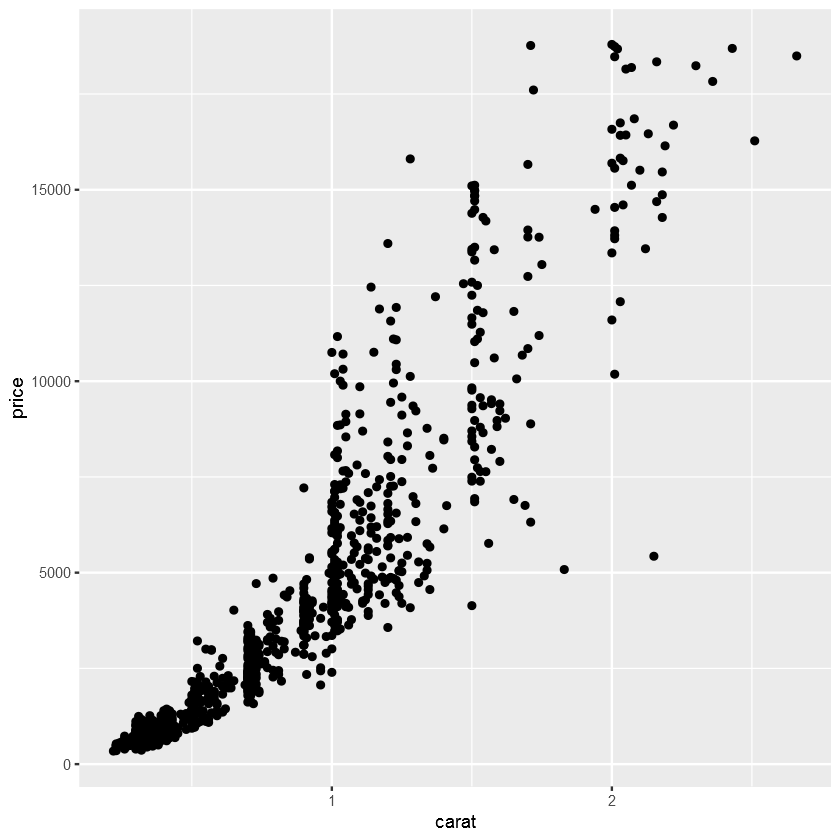

In [3]:
p + geom_point()

几何对象将在下面的小节介绍，这一节，关注的是数据和图形属性之间的映射。

如果想将切工（cut）映射到形状属性。只需要：

Warning message:
"Using shapes for an ordinal variable is not advised"

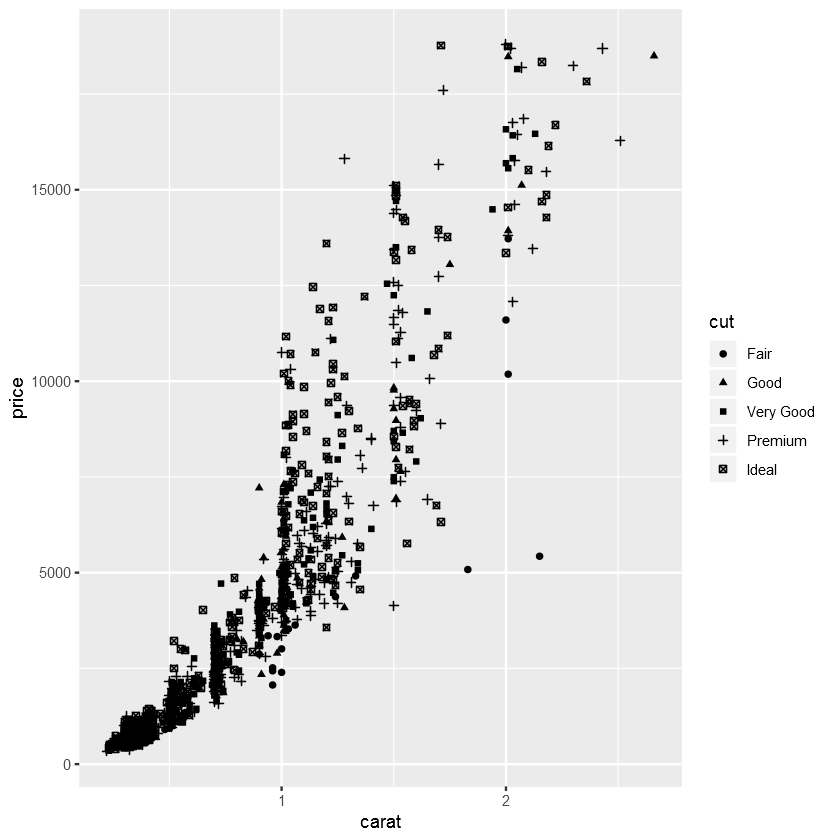

In [5]:
p <- ggplot(data = small, mapping = aes(x=carat, y=price, shape=cut))
p + geom_point()

 再比如我想将钻石的颜色（color）映射颜色属性：

Warning message:
"Using shapes for an ordinal variable is not advised"

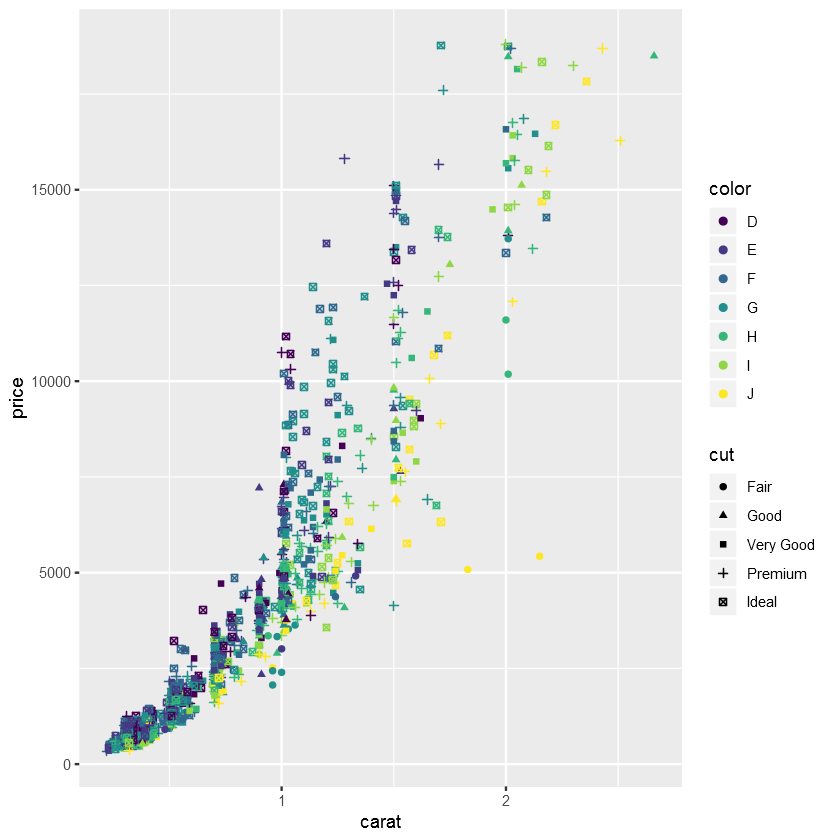

In [6]:
p <- ggplot(data=small, mapping=aes(x=carat, y=price, shape=cut, colour=color))
p+geom_point()

# 几何对象（Geometric）

在上面的例子中，各种属性映射由ggplot函数执行，只需要加一个图层，使用geom_point()告诉ggplot要画散点，于是所有的属性都映射到散点上。

geom_point()完成的就是几何对象的映射，
ggplot2提供了各种几何对象映射，
    
    geom_histogram用于直方图，
    geom_bar用于画柱状图，
    geom_boxplot用于画箱式图等等。

不同的几何对象，要求的属性会有些不同，这些属性也可以在几何对象映射时提供，比如上一图，也可以用以下语法来画：

Warning message:
"Using shapes for an ordinal variable is not advised"

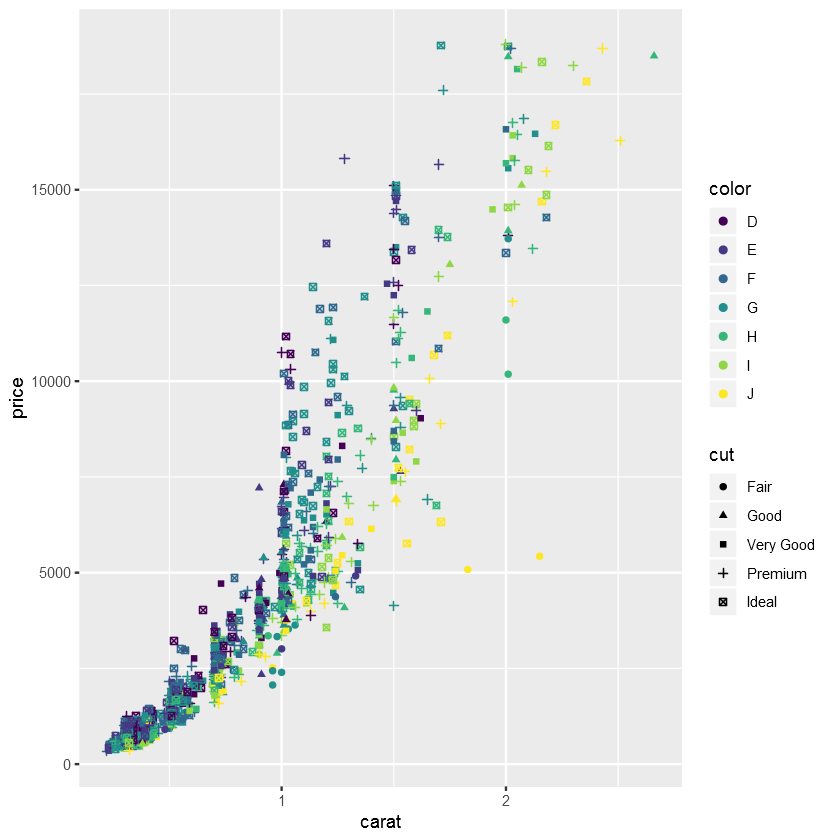

In [7]:
p <- ggplot(small)
p + geom_point(aes(x=carat, y=price,shape=cut, colour=color))

ggplot2支持图层，我通常把不同的图层中共用的映射提供给ggplot函数，而某一几何对象才需要的映射参数提供给geom_xxx函数。

这一小节我们来看一下各种常用的几何对象。

直方图 直方图最容易，提供一个x变量，画出数据的分布。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


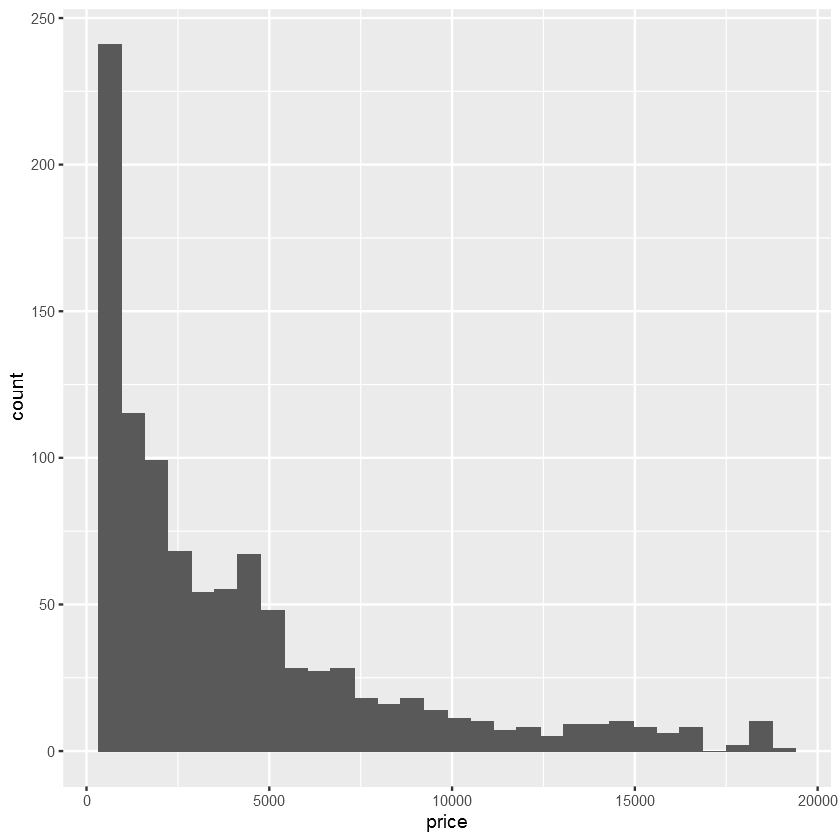

In [9]:
ggplot(small)+geom_histogram(aes(x=price))

同样可以根据另外的变量给它填充颜色，比如按不同的切工：

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


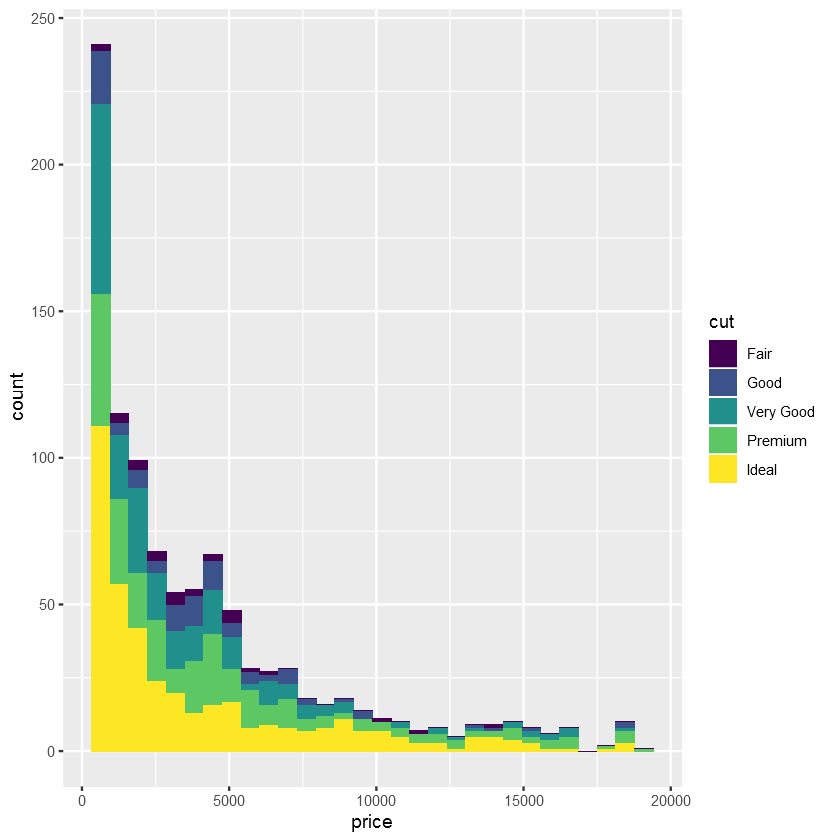

In [13]:
ggplot(small)+geom_histogram(aes(x=price, fill=cut))

也可以将其分开，side-by-side地画直方图。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


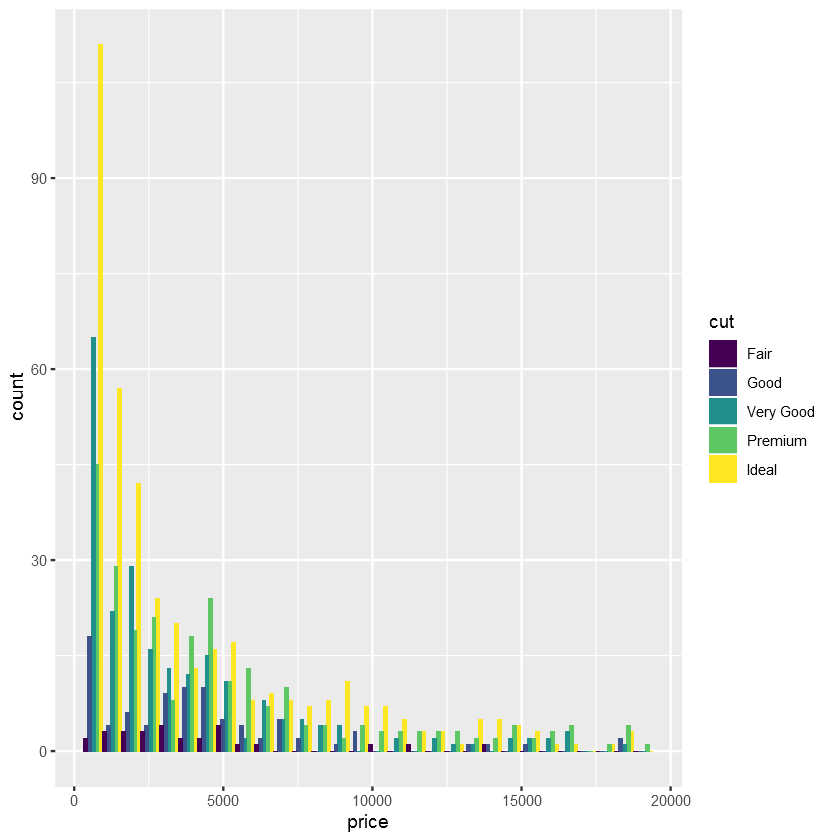

In [14]:
ggplot(small)+geom_histogram(aes(x=price, fill=cut), position="dodge")

还可以使用position=”fill”，按照相对比例来画。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 5 rows containing missing values (geom_bar)."

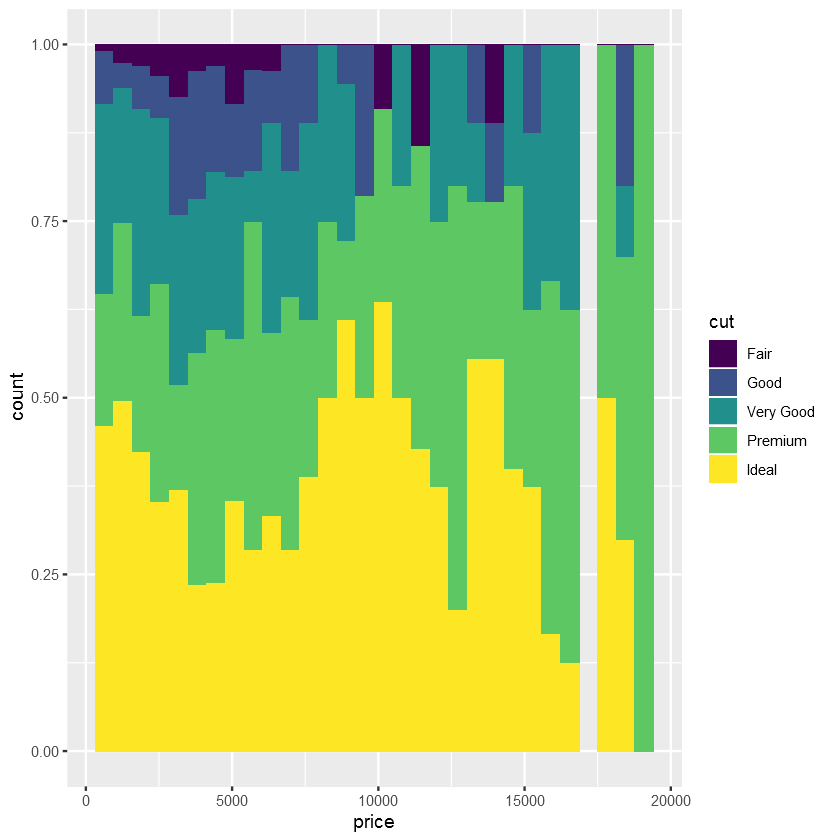

In [15]:
ggplot(small)+geom_histogram(aes(x=price, fill=cut), position="fill")

**柱状图**

柱状图非常适合于画分类变量。在这里以透明度（clarity）变量为例。按照不同透明度的钻石的数目画柱状图。


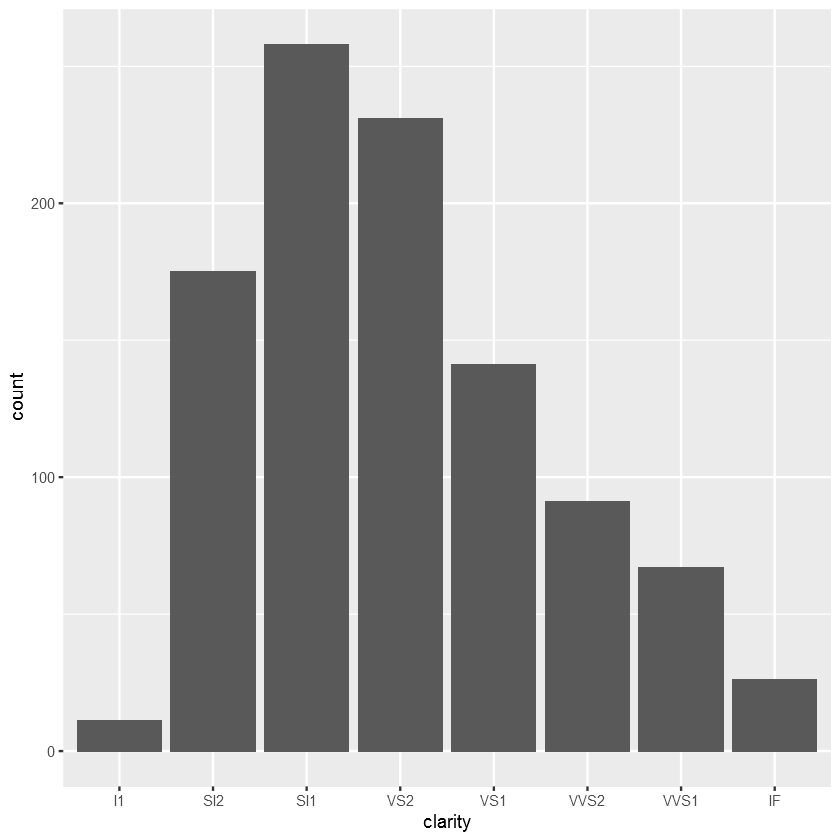

In [16]:
ggplot(small) + geom_bar(aes(x=clarity))

柱状图两个要素，一个是分类变量，一个是数目，也就是柱子的高度。数目在这里不用提供，因为ggplot2会通过x变量计算各个分类的数目。

当然你想提供也是可以的，通过stat参数，可以让geom_bar按指定高度画图，比如以下代码：

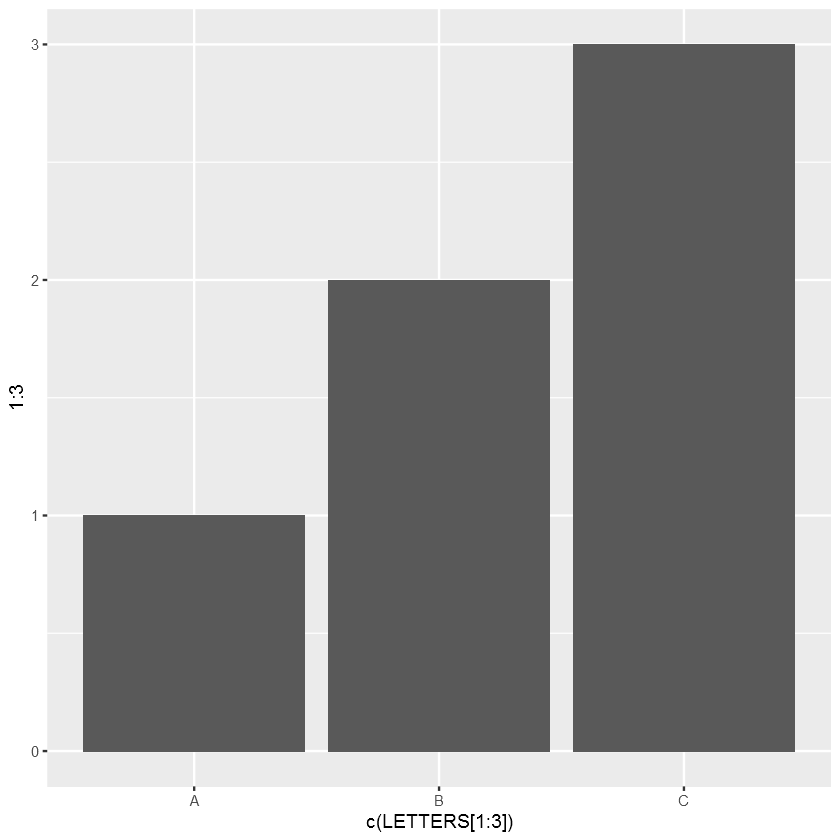

In [17]:
ggplot() + geom_bar(aes(x=c(LETTERS[1:3]),y=1:3), stat="identity")

柱状图和直方图是很像的，直方图把连续型的数据按照一个个等长的分区（bin）来切分，然后计数，画柱状图。而柱状图是分类数据，按类别计数。我们可以用前面直方图的参数来画side-by-side的柱状图，填充颜色或者按比例画图，它们是高度一致的。

柱状图是用来表示计数数据的，但在生物界却被经常拿来表示均值，加上误差来表示数据分布，这可以通常图层来实现，我将在图层一节中给出实例。

**密度函数图**

说到直方图，就不得不说密度函数图，数据和映射和直方图是一样的，唯一不同的是几何对象，geom_histogram告诉ggplot要画直方图，而geom_density则说我们要画密度函数图，在我们熟悉前面语法的情况下，很容易画出：

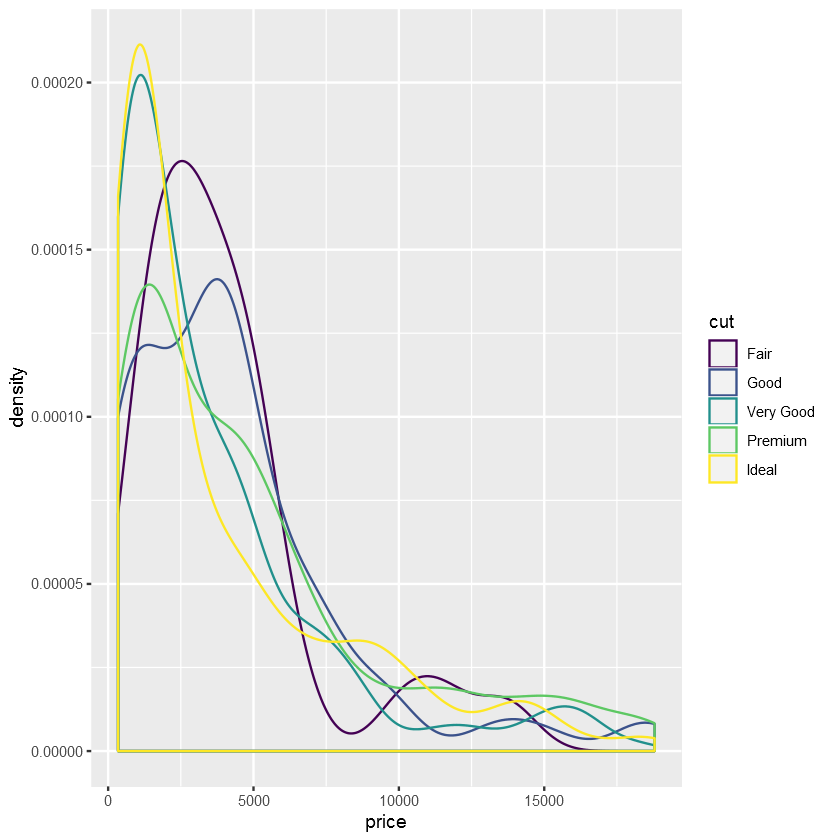

In [18]:
ggplot(small)+geom_density(aes(x=price,colour=cut))

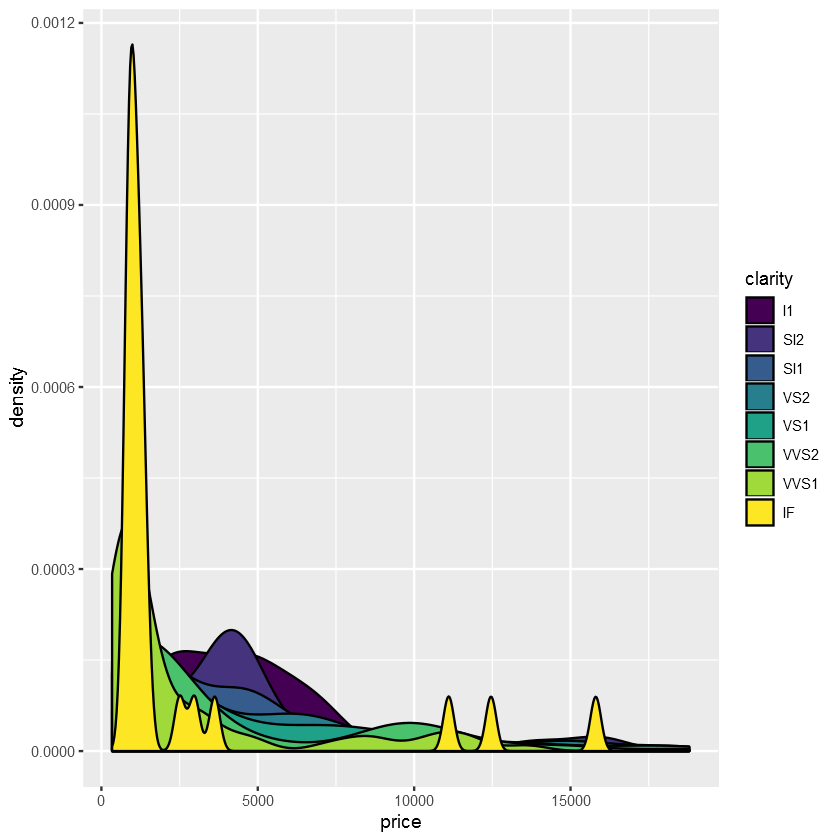

In [19]:
ggplot(small)+ geom_density(aes(x=price,fill=clarity))

colour参数指定的是曲线的颜色，而fill是往曲线下面填充颜色。

**箱式图**

数据量比较大的时候，用直方图和密度函数图是表示数据分布的好方法，而在数据量较少的时候，比如很多的生物实验，很多时候大家都是使用柱状图+errorbar的形式来表示，不过这种方法的信息量非常低，被Nature Methods吐槽，这种情况推荐使用boxplot。

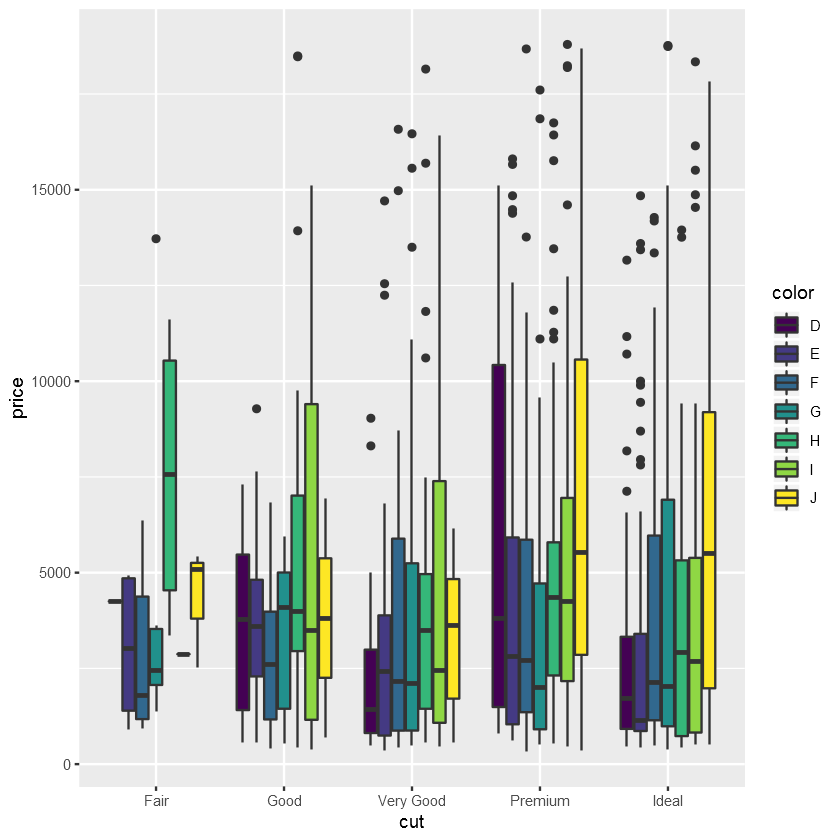

In [20]:
ggplot(small)+geom_boxplot(aes(x=cut, y=price, fill=color))

geom_boxplot将数据映射到箱式图上，上面的代码，我们应该很熟悉了，按切工(cut)分类，对价格(price)变量画箱式图，再分开按照color变量填充颜色。

ggplot2提供了很多的geom_xxx函数，可以满足我们对各种图形绘制的需求。

    geom_abline     
    geom_area   
    geom_bar        
    geom_bin2d
    geom_blank      
    geom_boxplot    
    geom_contour   
    geom_crossbar
    geom_density  
    geom_density2d  
    geom_dotplot   
    geom_errorbar
    geom_errorbarh  
    geom_freqpoly   
    geom_hex      
    geom_histogram
    geom_hline     
    geom_jitter     
    geom_line      
    geom_linerange
    geom_map      
    geom_path   
    geom_point    
    geom_pointrange
    geom_polygon  
    geom_quantile   
    geom_raster   
    geom_rect
    geom_ribbon   
    geom_rug    
    geom_segment  
    geom_smooth
    geom_step    
    geom_text   
    geom_tile     
    geom_violin
    geom_vline

** 标尺(Scale)**

前面我们已经看到了，画图就是在做映射，不管是映射到不同的几何对象上，还是映射各种图形属性。这一小节介绍标尺，在对图形属性进行映射之后，使用标尺可以控制这些属性的显示方式，比如坐标刻度，可能通过标尺，将坐标进行对数变换；比如颜色属性，也可以通过标尺，进行改变。

Warning message:
"Using shapes for an ordinal variable is not advised"

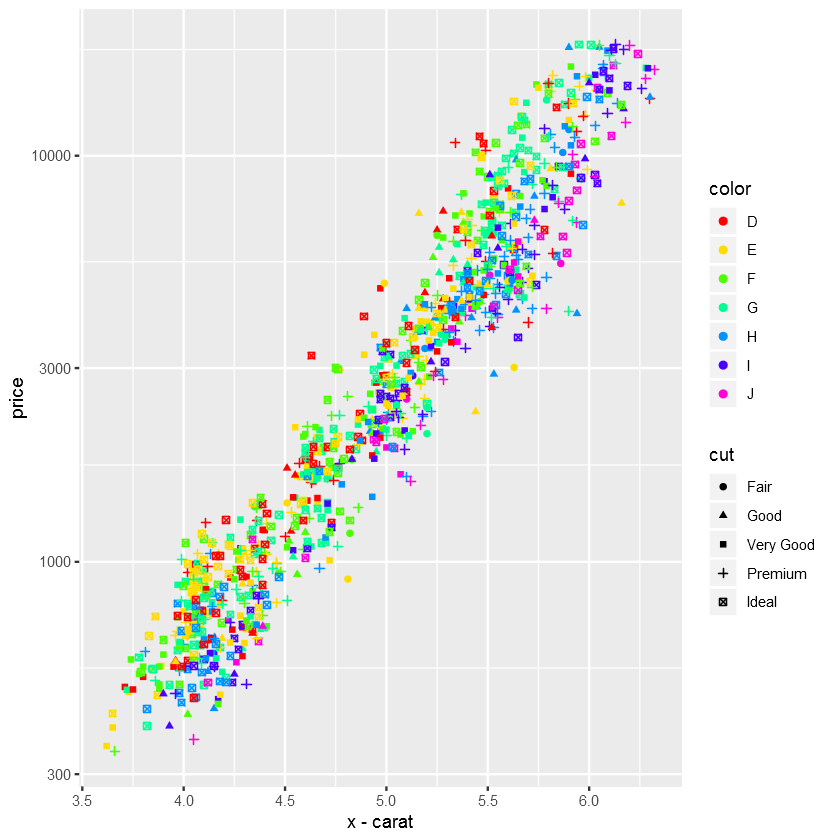

In [22]:
ggplot(small)+ geom_point(aes(x-carat,y=price,shape=cut,colour=color))+scale_y_log10()+scale_colour_manual(values=rainbow(7))

以数据（Data）和映射（Mapping)一节中所画散点图为例，将Y轴坐标进行log10变换，再自己定义颜色为彩虹色。

# 统计变换（Statistics）

统计变换对原始数据进行某种计算，然后在图上表示出来，例如对散点图上加一条回归线。

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


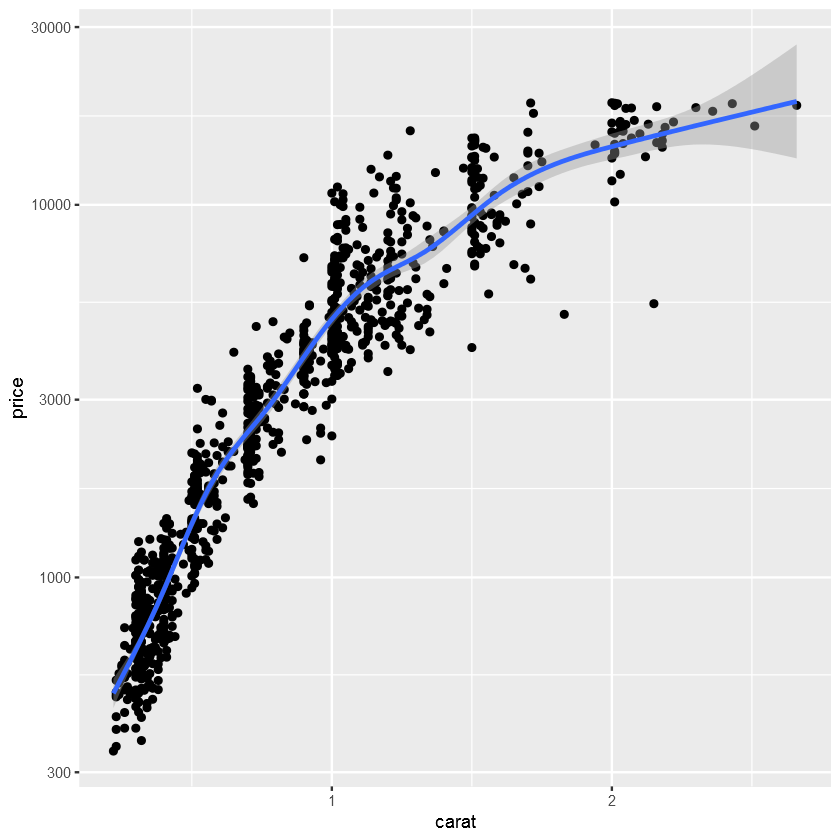

In [23]:
ggplot(small,aes(x=carat, y= price)) + geom_point()+scale_y_log10()+stat_smooth()

这里就不按颜色、切工来分了，不然ggplot会按不同的分类变量分别做回归，图就很乱，如果我们需要这样做，我们可以使用分面，这个将在后面介绍。

这里，aes所提供的参数，就通过ggplot提供，而不是提供给geom_point，因为ggplot里的参数，相当于全局变量，geom_point()和stat_smooth()都知道x,y的映射，如果只提供给geom_point()，则相当于是局部变量，geom_point知道这种映射，而stat_smooth不知道，当然你再给stat_smooth也提供x,y的映射，不过共用的映射，还是提供给ggplot好。
ggplot2提供了多种统计变换方式：

![ggplot2.jpg](./picture/ggplot2.jpg)

统计变换是非常重要的功能，我们可以自己写函数，基于原始数据做某种计算，并在图上表现出来，也可以通过它改变geom_xxx函数画图的默认统计参数。

# 坐标系统（Coordinante）

坐标系统控制坐标轴，可以进行变换，例如XY轴翻转，笛卡尔坐标和极坐标转换，以满足我们的各种需求。

坐标轴翻转由coord_flip()实现

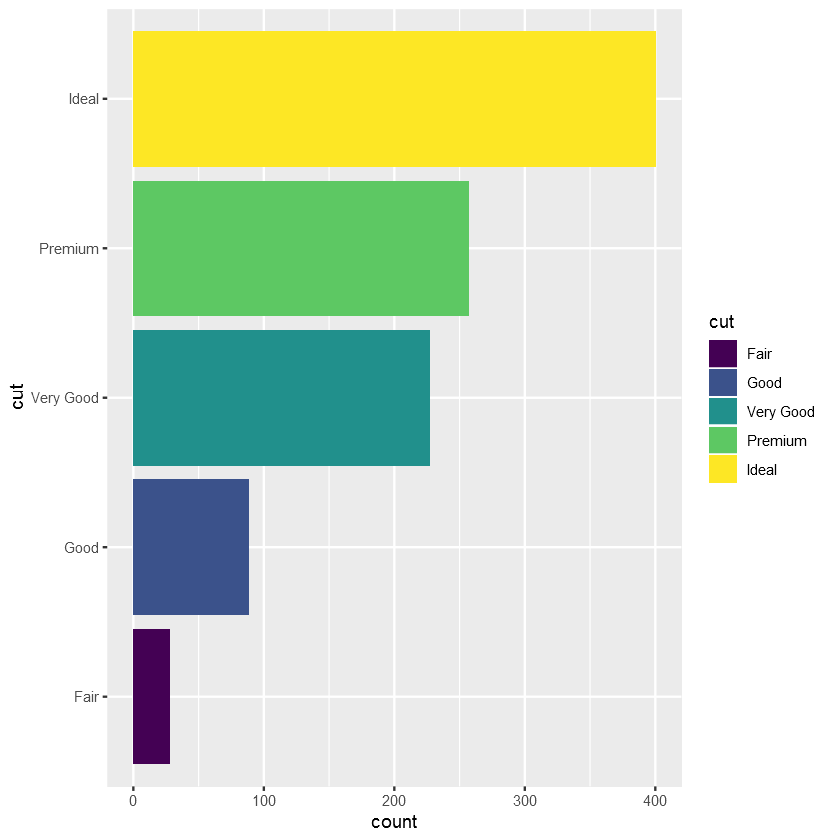

In [25]:
ggplot(small) + geom_bar(aes(x=cut,fill = cut))+coord_flip()

而转换成极坐标可以有coorf_polar()实现：

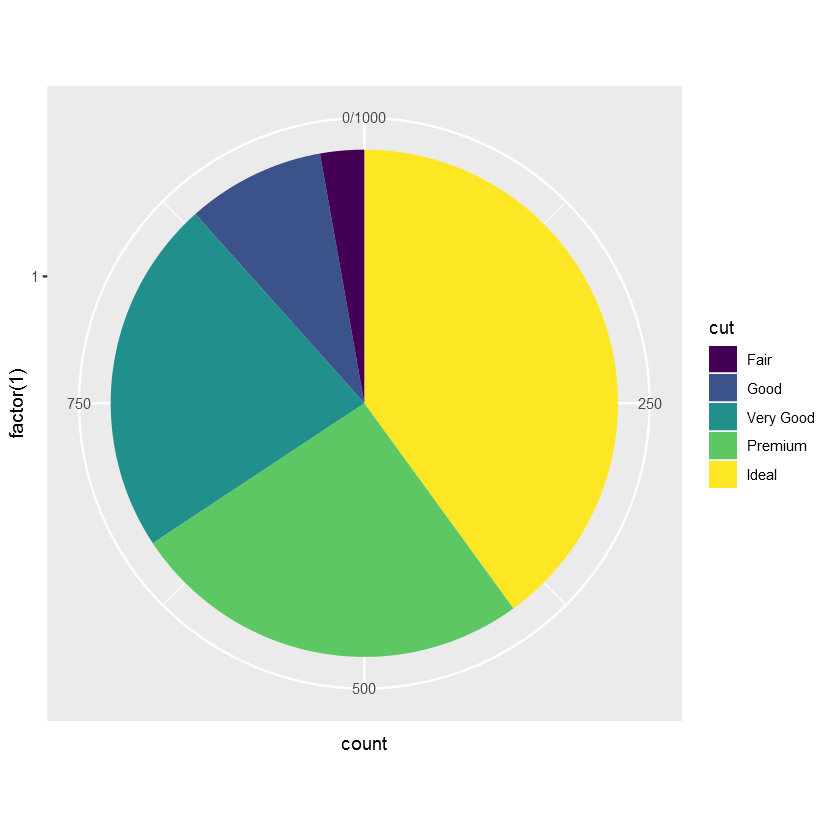

In [26]:
ggplot(small)+geom_bar(aes(x=factor(1), fill=cut)) + coord_polar(theta="y")

这也是为什么之前介绍常用图形画法时没有提及饼图的原因，饼图实际上就是柱状图，只不过是使用极坐标而已，柱状图的高度，对应于饼图的弧度，饼图并不推荐，因为人类的眼睛比较弧度的能力比不上比较高度（柱状图）

还可以画靶心图：

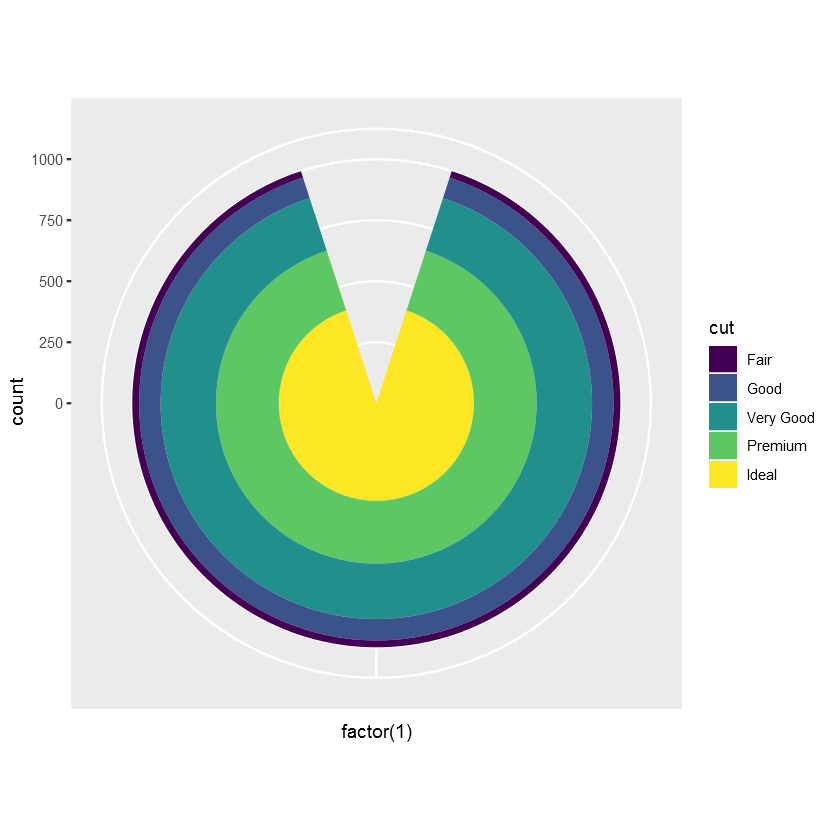

In [27]:
ggplot(small)+geom_bar(aes(x=factor(1),fill=cut))+coord_polar()

以及风玫瑰图（windrose）

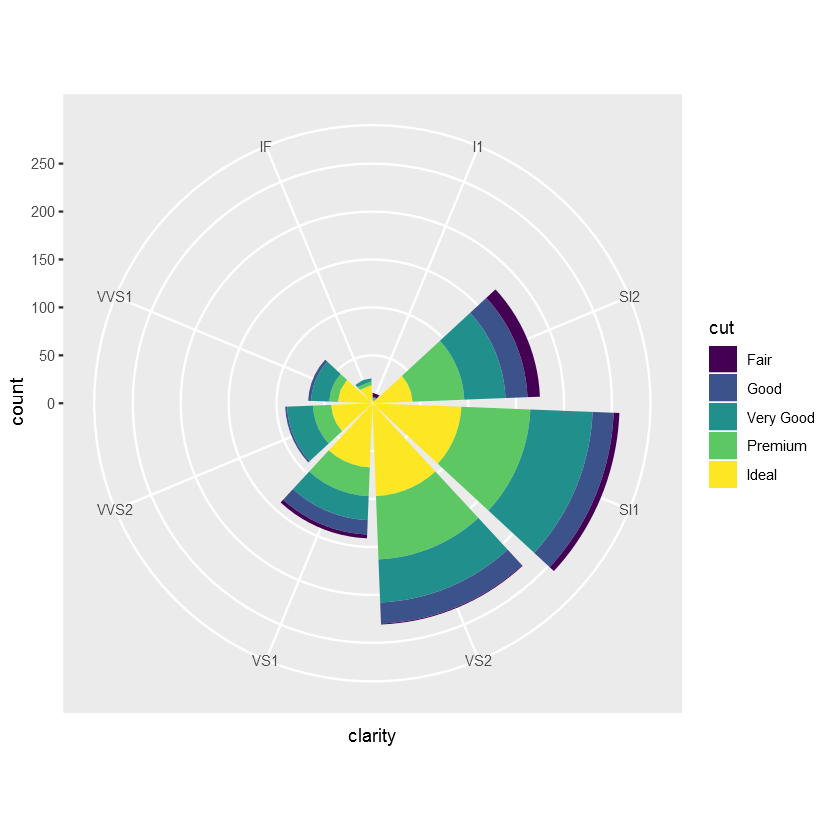

In [28]:
ggplot(small)+geom_bar(aes(x=clarity,fill=cut))+ coord_polar()

# 图层（layer）

photoshop流行的原因在于PS
3.0时引入图层的概念，ggplot的牛B之处在于使用+号来叠加图层，这堪称是泛型编程的典范。
在前面散点图上，我们已经见识过，加上了一个回归线拟合的图层。

有了图层的概念，使用ggplot画起图来，就更加得心应手。

做为图层的一个很好的例子是蝙蝠侠logo，batman
logo由6个函数组成，在下面的例子中，我先画第一个函数，之后再加一个图层画第二个函数，不断重复这一过程，直到六个函数全部画好。

Warning message:
"Removed 2 rows containing missing values (geom_point)."

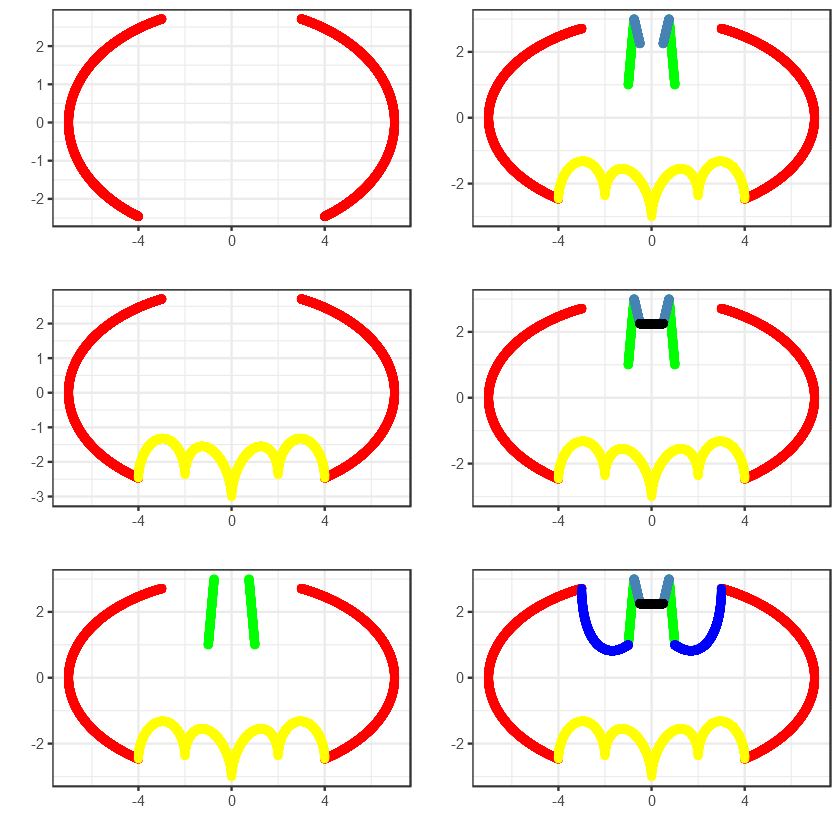

In [39]:
library(grid)
require(ggplot2)
f1 <- function(x) {
    y1 <- 3*sqrt(1-(x/7)^2)
    y2 <- -3*sqrt(1-(x/7)^2)
    y <- c(y1,y2)
    d <- data.frame(x=x,y=y)
    d <- d[d$y > -3*sqrt(33)/7,]    
    return(d)
}

x1 <- c(seq(3, 7, 0.001), seq(-7, -3, 0.001))
d1 <- f1(x1)
p1 <- ggplot(d1,aes(x,y)) + geom_point(color="red") +xlab("") + ylab("") + theme_bw()

x2 <- seq(-4,4, 0.001)
y2 <- abs(x2/2)-(3*sqrt(33)-7)*x2^2/112-3 + sqrt(1-(abs(abs(x2)-2)-1)^2)
d2 <- data.frame(x2=x2, y2=y2)
p2 <- p1 + geom_point(data=d2, aes(x=x2,y=y2), color="yellow")

x3 <- c(seq(0.75,1,0.001), seq(-1,-0.75,0.001))
y3 <- 9-8*abs(x3)
d3 <- data.frame(x3=x3, y3=y3)
p3 <- p2+geom_point(data=d3, aes(x=x3,y=y3), color="green")

x4 <- c(seq(0.5,0.75,0.001), seq(-0.75,-0.5,0.001))
y4 <- 3*abs(x4)+0.75
d4 <- data.frame(x4=x4,y4=y4)
p4 <- p3+geom_point(data=d4, aes(x=x4,y=y4), color="steelblue")

x5 <- seq(-0.5,0.5,0.001)
y5 <- rep(2.25,length(x5))
d5 <- data.frame(x5=x5,y5=y5)
p5 <- p4+geom_point(data=d5, aes(x=x5,y=y5))

x6 <- c(seq(-3,-1,0.001), seq(1,3,0.001))
y6 <- 6 * sqrt(10)/7 +(1.5 - 0.5 * abs(x6)) * sqrt(abs(abs(x6)-1)/(abs(x6)-1)) -    6 * sqrt(10) * sqrt(4-(abs(x6)-1)^2)/14
d6 <- data.frame(x6=x6,y6=y6)
p6 <- p5+geom_point(data=d6,aes(x=x6,y=y6), colour="blue")

multiplot <- function (..., plotlist = NULL, cols = 1, layout = NULL) {
    plots <- c(list(...), plotlist)
    numPlots = length(plots)    
    if (is.null(layout)) {
        layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
            ncol = cols, nrow = ceiling(numPlots/cols))
    }    
    if (numPlots == 1) {
        print(plots[[1]])
    }    
    else {
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout),
            ncol(layout))))        
        for (i in 1:numPlots) {
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                layout.pos.col = matchidx$col))
        }
    }
}

multiplot(p1,p2,p3,p4,p5,p6, cols=2)

# 分面（Facet）

在《ggplot2: 数据分析与图形艺术》一书的翻译中，一开始译者把facet翻译成切片，我在校稿的时候发现了，给他们写信，推荐翻译成分面，如果是slice这个词，翻译成切片倒是很精准，BSD的硬盘分区就叫slice，但facet从词源上看就是小脸的意思，翻译成分面才到位。给他们写信的时候，我还专门查了CNKI翻译助手，发现这词在信息学中，翻成分面早已是固定的。我感觉这是我对这本书翻译的最大贡献，校稿过程中发现的少量小问题远比不上这个关键词意思的把握上。

分面可以让我们按照某种给定的条件，对数据进行分组，然后分别画图。
在统计变换一节中，提到如果按切工分组作回归线，显然图会很乱，有了分面功能，我们可以分别作图。

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


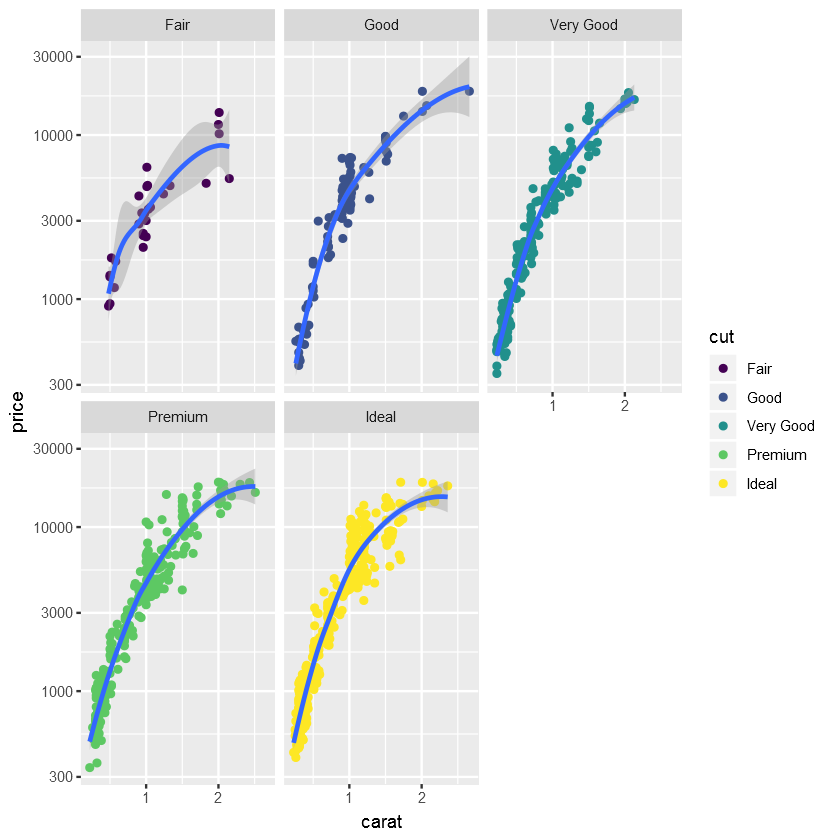

In [40]:
ggplot(small, aes(x=carat,y=price))+geom_point(aes(colour=cut))+scale_y_log10()+facet_wrap(~cut)+stat_smooth()

# 主题（Theme）

通过ggplot画图之后，我们可能还需要对图进行定制，像title, xlab,
ylab这些高频需要用到的，自不用说，ggplot2提供了ggtitle(),
xlab()和ylab()来实现。 比如：

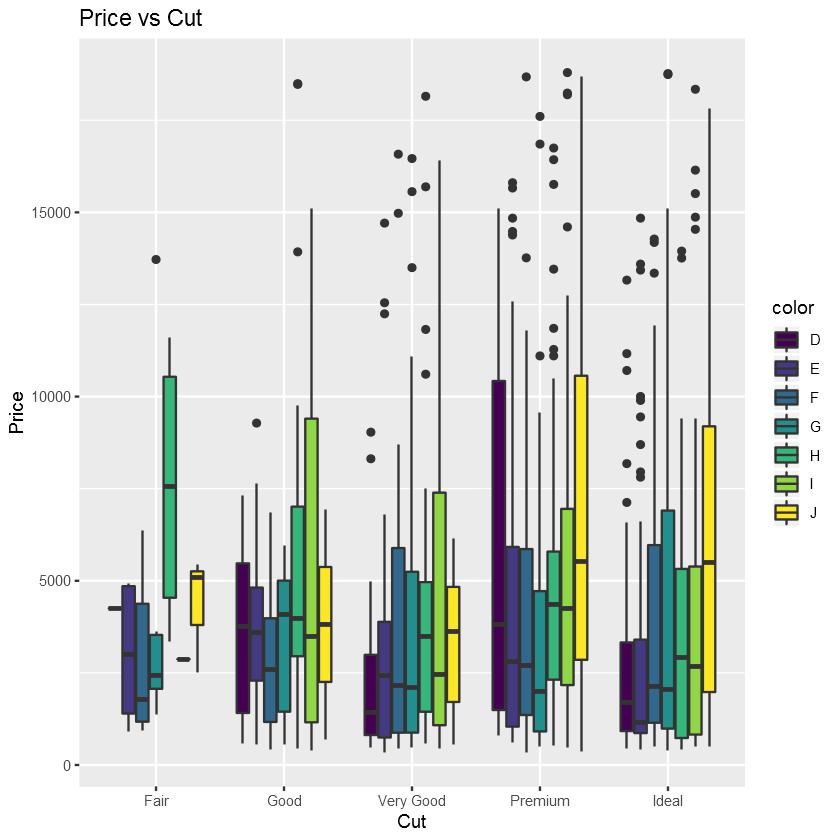

In [41]:
p <- ggplot(small)+geom_boxplot(aes(x=cut,y=price,fill=color))
p + ggtitle("Price vs Cut")+ xlab("Cut") + ylab("Price")

但是这个远远满足不了需求，我们需要改变字体，字体大小，坐标轴，背景等各种元素，这需要通过theme()函数来完成。

ggplot2提供一些已经写好的主题，比如theme_grey()为默认主题，我经常用的theme_bw()为白色背景的主题，还有theme_classic()主题，和R的基础画图函数较像。

别外ggthemes包提供了一些主题可供使用，包括：

 ![ggplot21.jpg](./picture/ggplot21.jpg)

Loading required package: ggthemes
Warning message:
"package 'ggthemes' was built under R version 3.5.3"

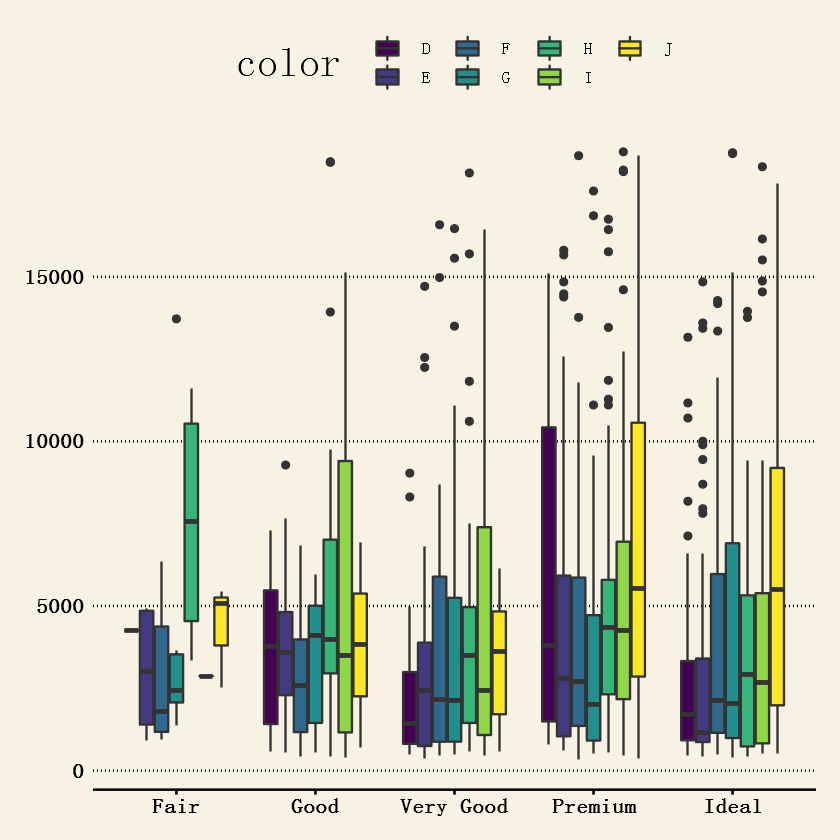

In [45]:
require(ggthemes)
p + theme_wsj()

至于如何改变这些元素

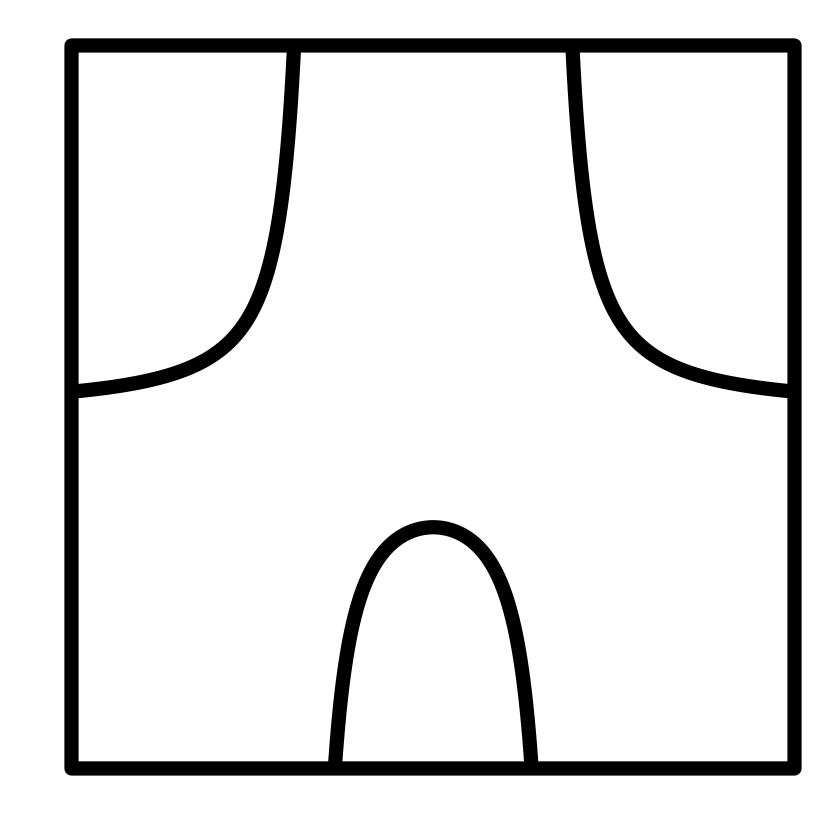

In [46]:
f <- function(x) 1/(x^2-1)
x <- seq(-3,3, by=0.001)
y <- f(x)
d <- data.frame(x=x,y=y)

p <- ggplot()
p <- p+geom_rect(fill = "white",color="black",size=3,
aes(NULL, NULL,xmin=-3, xmax=3,
ymin=-3,ymax=3, alpha=0.1))

p <- p + geom_line(data=d, aes(x,y), size=3)+ylim(-3,3)
theme_null <- function() {
    theme_bw() %+replace%
    theme(axis.text.x=element_blank(),
    axis.text.y=element_blank(),
    legend.position="none",
    panel.grid.minor=element_blank(),
    panel.grid.major=element_blank(),
    panel.background=element_blank(),
    axis.ticks=element_blank(),
    panel.border=element_blank())
}

p+theme_null()+xlab("")+ylab("")

详细的说明，可以参考?theme的帮助文档。

# 二维密度图

在这个文档里，为了作图方便，我们使用diamonds数据集的一个子集，如果使用全集，数据量太大，画出来散点就糊了，这种情况可以使用二维密度力来呈现。

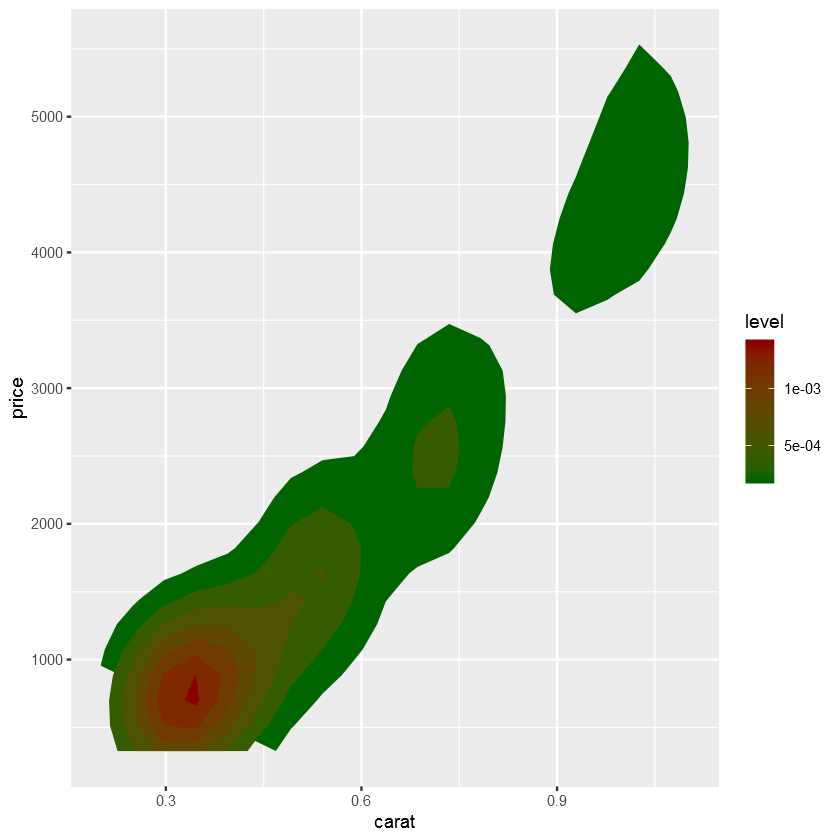

In [47]:
ggplot(diamonds, aes(carat, price))+ stat_density2d(aes(fill = ..level..), geom="polygon")+ scale_fill_continuous(high='darkred',low='darkgreen')

# ggplot2实例

蝴蝶图:

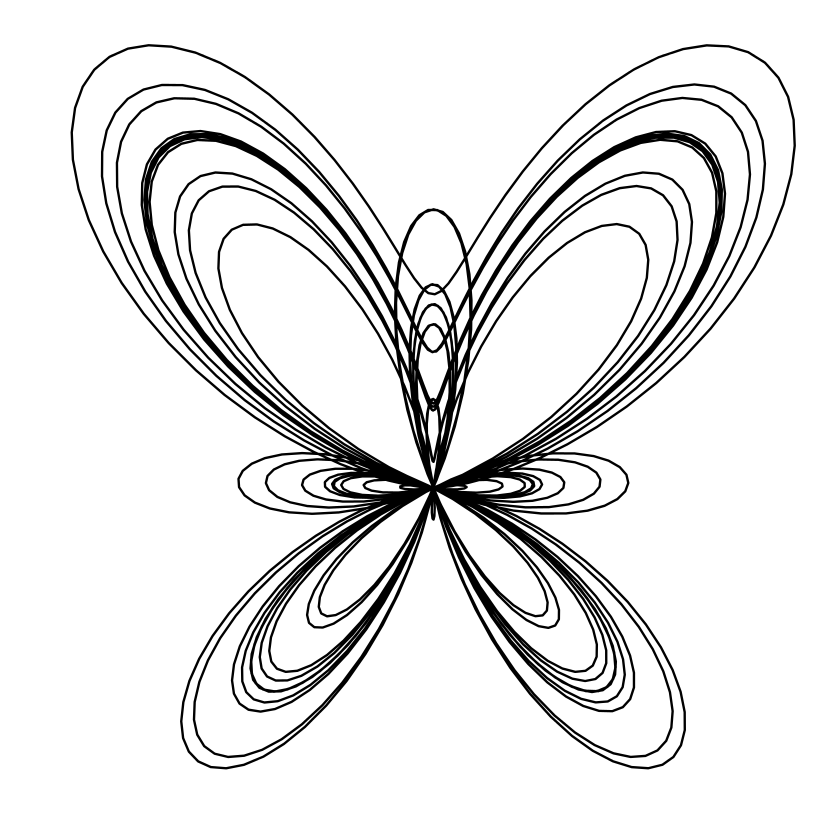

In [49]:
theta <- seq(0,24*pi, len=2000)
radius <- exp(cos(theta)) - 2*cos(4*theta) + sin(theta/12)^5
dd <- data.frame(x=radius*sin(theta), y=radius*cos(theta))
ggplot(dd, aes(x, y))+geom_path()+theme_null()+xlab("")+ylab("")

这个图，我想展示的是对细节的修改上，在画囧字的时候，把画布上的元素都给清除了，我把它定义为theme_null主题，在这里，直接应用，我们可以形成自己的画图风格，并写出自己的主题函数固定下来。

最后以生物界中常用的柱状图+误差图为实例，展示ggplot2非常灵活的图层。以作者2011年发表的文章Phosphoproteome profile of human lung cancer cell line A549中的westernblot数据为例。这个实例展示了图层，标尺，主题，注释和各种细节微调多种元素。

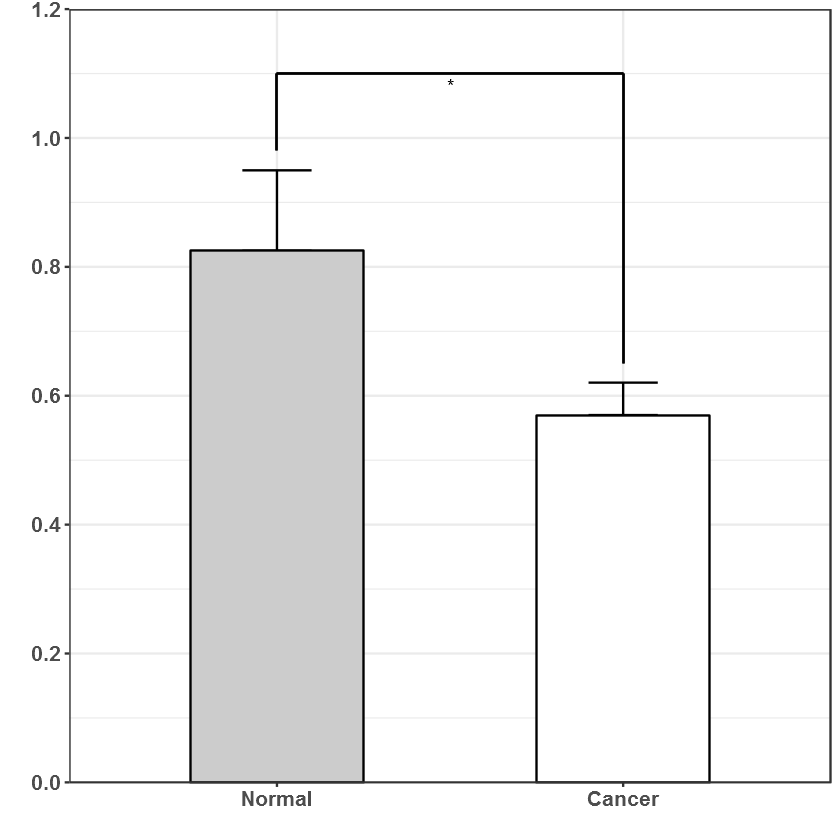

In [50]:
Normal <- c(0.83, 0.79, 0.99, 0.69)
Cancer <- c(0.56, 0.56, 0.64, 0.52)
m <- c(mean(Normal), mean(Cancer))
s <- c(sd(Normal), sd(Cancer))
d <- data.frame(V=c("Normal", "Cancer"), mean=m, sd=s)
d$V <- factor(d$V, levels=c("Normal", "Cancer"))

p <- ggplot(d, aes(V, mean, fill=V, width=.5))
p <- p+geom_errorbar(aes(ymin=mean, ymax=mean+sd, width=.2), 
                     position=position_dodge(width=.8))
p <- p + geom_bar(stat="identity", position=position_dodge(width=.8), colour="black")
p <- p + scale_fill_manual(values=c("grey80", "white"))
p <- p + theme_bw() +theme(legend.position="none") + xlab("") + ylab("")
p <- p + theme(axis.text.x = element_text(face="bold", size=12), 
               axis.text.y = element_text(face="bold", size=12))
p <- p+scale_y_continuous(expand=c(0,0), limits=c(0, 1.2), breaks=seq(0, 1.2, by=.2))
p <- p+geom_segment(aes(x=1, y=.98, xend=1, yend=1.1))
p <- p+geom_segment(aes(x=2, y=.65, xend=2, yend=1.1))
p <- p+geom_segment(aes(x=1, y=1.1, xend=2, yend=1.1))
p <- p + annotate("text", x=1.5, y=1.08, label="*")
print(p)